In [27]:
import os
import pandas as pd
import jieba

os.chdir("D:/data")
df=pd.read_csv("library.csv",encoding='gb18030')


In [2]:
from gensim.models import KeyedVectors

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# 使用gensim加载预训练中文分词embedding
cn_model = KeyedVectors.load_word2vec_format('sgns.zhihu.bigram.bz2',binary=False)

In [4]:
# 由此可见每一个词都对应一个长度为300的向量
embedding_dim = cn_model['银行'].shape[0]
print('词向量的长度为{}'.format(embedding_dim))
cn_model['银行']

词向量的长度为300


array([ 1.202674e+00,  5.784300e-02,  2.804200e-02,  7.729240e-01,
       -4.103000e-01, -2.434790e-01,  5.011850e-01,  8.181130e-01,
       -7.143610e-01, -3.139140e-01,  4.725800e-02,  2.648160e-01,
        2.849760e-01, -2.494920e-01,  6.336580e-01, -8.473740e-01,
       -1.596570e-01,  1.599550e-01,  2.397100e-01, -1.782340e-01,
        5.382210e-01,  2.105200e-01, -4.496460e-01,  4.930530e-01,
       -5.555120e-01,  3.639270e-01, -2.500940e-01, -4.942340e-01,
       -4.680760e-01,  8.201910e-01,  5.261000e-02, -1.974040e-01,
       -8.377050e-01,  2.295920e-01, -2.134730e-01,  1.162631e+00,
        2.891990e-01,  5.767800e-01,  2.354510e-01,  4.190350e-01,
        2.579420e-01,  4.770000e-03,  3.461120e-01,  1.741000e-03,
        3.270490e-01,  2.684250e-01, -1.164500e-02,  8.542800e-02,
        5.401410e-01,  4.332900e-02,  1.667190e-01, -3.986320e-01,
       -2.243270e-01, -3.105420e-01, -7.675200e-02, -5.832140e-01,
        3.000070e-01,  5.029010e-01,  9.413840e-01,  4.982410e

In [5]:
# 找出最相近的词，余弦相似度
cn_model.most_similar(positive=['银行'], topn=20)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('金融机构', 0.6889347434043884),
 ('商业银行', 0.6888741254806519),
 ('工行', 0.636052131652832),
 ('中国银行', 0.6262412071228027),
 ('信贷', 0.6193749308586121),
 ('国有银行', 0.6185743808746338),
 ('建行', 0.6183106899261475),
 ('券商', 0.6176693439483643),
 ('柜员', 0.6147729158401489),
 ('股份制', 0.6130728721618652),
 ('外资银行', 0.6061678528785706),
 ('证券公司', 0.5997269153594971),
 ('信用卡', 0.5977650880813599),
 ('储户', 0.5974897146224976),
 ('四大行', 0.5959688425064087),
 ('工商银行', 0.5914175510406494),
 ('信托', 0.588060200214386),
 ('承兑汇票', 0.5863996148109436),
 ('农行', 0.5819505453109741),
 ('财务公司', 0.5815768837928772)]

In [6]:
#读取停止词，并且把停止词放到一个list里边 
stopwords = [line.strip() for line in open("D:/data/all_stop_word.txt", 'r', encoding='utf-8').readlines()]  

In [7]:
type(stopwords)

list

In [8]:
len(stopwords)

1893

In [178]:
#自己可以加入一些停止词
stopwords.append("谢谢")

In [28]:
df.head()

,ID,Title,Content,Reply
0,1,CALIS北京市文献信息服务中心,CALIS北京市文献信息服务中心，我们学校入口的密码应该填是什么?\n谢谢！,你好！这个暂时还不能用。
1,2,软件通,软件通是在试用资源里面，有些视屏看不了，说是因为是试用的，恳请学校通过一系列的相关措施使同学...,你好！试用库只开放部分资源。我馆已购买了《51CTO学院》-IT技能学习资源数据库，两个库相似。
2,3,五月份图书到期短信没有提醒,平时借书到期都是有短信和邮箱提醒我及时还书，可是这个月图书到期，我没有收到到期提醒，邮箱短信...,你好！感谢提醒，我们会及时检查系统。
3,4,有关新东方等一系列资源的使用,不知道该怎样才能免费使用学校已经购买的新东方教育里的一些资源以及其它类似资源，表示进去网站之...,你好！需要校园网ip才能免费使用，你也可以使用校外访问或者在校园网ip范围内申请注册。
4,5,《SciFinder在化学科学中的应用》,朱传娴老师在 《SciFinder在化学科学中的应用》讲座结束后，说把讲座ppt拷贝下给图书...,你好！2018“文献资源推广月”讲座课件近期会统一上传，请关注图书馆的“通知公告”。


In [226]:
#文本量的大小
df.shape

(1161, 4)

In [10]:
#统计段话的字数
df['word_count'] = df['Content'].str.len()

In [11]:
df['word_count'].head()

0     37
1     68
2    142
3     91
4     69
Name: word_count, dtype: int64

In [23]:
df['word_count'].max()

587

In [24]:
df[df['word_count']==587]

,ID,Title,Content,Reply,word_count,numerics,content_cutted
673,674,关于图书馆自习室占座的建议,这两天开学了，自习室又要开始收书不让占座。学生占座无非两个原因：1、想有个固定位子，随时来随...,你好！非常感谢您对图书馆工作的关心和理解，您所提的建议非常好，我们将认真研究后实施，并敦促图...,587,0,两天 开学 自习室 收书 不让 占座 学生 占座 无非 两个 原因 固定 位子 有座 不用 ...


In [12]:
#统计文本中出现的数字
df['numerics'] = df['Content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [14]:
df['numerics'].head()

0    0
1    0
2    0
3    0
4    0
Name: numerics, dtype: int64

In [13]:
#文本中总共的数据
df['numerics'].sum()

5

In [31]:
#进行分词，定义分词函数，去除停止词并且长度为1的词
def chinese_word_cut(mytext):
    word_list=jieba.cut(mytext,cut_all=False)
    return " ".join([w for w in word_list if w not in stopwords and len(w) > 1])


In [32]:
#进行分词
df["content_cutted"] = df.Content.apply(chinese_word_cut)

In [33]:
df["content_cutted"].head()

0                  CALIS 北京市 文献 信息 服务中心 学校 入口 密码 填是 谢谢
1    软件 通是 试用 资源 视屏 是因为 试用 恳请 学校 一系列 相关 措施 同学 完整 视频 知识
2    平时 借书 到期 短信 邮箱 提醒 还书 图书 到期 收到 到期 提醒 邮箱 短信 查询 借...
3    怎样才能 免费 学校 购买 新东方 教育 资源 类似 资源 网站 发现 学校 购买 课程 付...
4    朱传娴 老师 SciFinder 化学 科学 讲座 结束 讲座 ppt 拷贝 图书馆 管理人...
Name: content_cutted, dtype: object

In [18]:
#统计词频
freq = pd.Series(' '.join(df['content_cutted']).split()).value_counts()

In [19]:
freq[1:20]

老师     409
请问     329
您好     296
下载     257
谢谢     219
登录     190
密码     189
显示     168
访问     160
学校     156
登陆     131
校外     130
数据库    130
论文     129
资源     126
账号     119
知网     114
文献     111
希望      91
dtype: int64

In [20]:
freq[-20:]

服务站              1
很着急              1
Find             1
2015mba          1
考验               1
报告厅              1
john             1
袁玲丽              1
reinstatement    1
Provide          1
知海               1
上限               1
研究者              1
定期维护             1
打扫卫生             1
一半               1
Wliey            1
ie               1
黑色               1
协商               1
dtype: int64

In [21]:
freq1 = list(freq.index)

In [35]:
freq1[1:20]

['老师',
 '请问',
 '您好',
 '下载',
 '谢谢',
 '登录',
 '密码',
 '显示',
 '访问',
 '学校',
 '登陆',
 '校外',
 '数据库',
 '论文',
 '资源',
 '账号',
 '知网',
 '文献',
 '希望']

In [247]:
#将一些频率过低的词去掉
df['content_cutted'] = df['content_cutted'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['content_cutted'].head()

0                  CALIS 安徽省 文献 信息 服务中心 学校 入口 密码 填是 谢谢
1    软件 通是 试用 资源 视屏 是因为 试用 恳请 学校 一系列 相关 措施 同学 完整 视频 知识
2    平时 借书 到期 短信 邮箱 提醒 还书 图书 到期 收到 到期 提醒 邮箱 短信 查询 借...
3    怎样才能 免费 学校 购买 新东方 教育 资源 类似 资源 网站 发现 学校 购买 课程 付...
4    朱传娴 SciFinder 化学 科学 讲座 结束 讲座 ppt 拷贝 管理人员 读者 自行...
Name: content_cutted, dtype: object

In [252]:
rare_freq = pd.Series(' '.join(df['content_cutted']).split()).value_counts()[-200:]
rare_freq

MeTel          1
依然             1
camc           1
Technical      1
多年             1
APP            1
中国地质大学         1
整合             1
75             1
共识             1
会员帐号           1
登上             1
前几次            1
LN             1
土水             1
03             1
chaoxing       1
遮光             1
号段             1
抢订             1
中呐             1
推车             1
我办             1
一回             1
总输             1
numbers        1
深度             1
元旦节            1
好几个            1
current        1
              ..
idp            1
unavailable    1
characters     1
相处             1
工作量            1
九个             1
八月份            1
异馆             1
Find           1
机汽             1
pdf            1
不光会            1
处于             1
月初             1
重启             1
Data           1
上进             1
Analysis       1
飞进来            1
范钦             1
换个             1
朱传娴            1
现场             1
Refer          1
据库             1
尚未             1
有过             1
还书扣           

In [185]:
#构造词云
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [182]:
all_word_list=df['content_cutted'].sum()

In [183]:
len(all_word_list)

50501

In [50]:
df1[1]

'软件 通是 在 试用 资源 里面 ， 有些 视屏 看 不了 ， 说 是因为 是 试用 的 ， 恳请 学校 通过 一系列 的 相关 措施 使 同学 们 可以 看到 完整 的 视频 ， 从而 获得 更 丰富 的 知识 。'

In [52]:
df1[2]

'平时 借书 到期 都 是 有 短信 和 邮箱 提醒 我 及时 还书 ， 可是 这个 月 图书 到期 ， 我 没有 收到 到期 提醒 ， 邮箱 短信 都 没有 。 今天 查询 了 一下 借阅 状态 ， 发现 我 已经 超期 了 ， 到期 日期 是 5 月 14 日 和 5 月 15 日 ， 超期 了 13 天 和 12 天 ， 扣 了 我 10 元 罚款 。 不 知道 这个 是不是 只有 我 一个 人 这样 ， 如果 其他人 也 这样 最好 及时 提醒 告知 。'

In [53]:
len(df1[1])

108

In [54]:
len(df1[2])

232

In [200]:
import collections
from imageio import imwrite,imread

In [191]:

df4=collections.Counter(all_word_list)

In [194]:
df4

Counter({'C': 80,
         'A': 90,
         'L': 32,
         'I': 156,
         'S': 126,
         ' ': 13640,
         '安': 29,
         '徽': 10,
         '省': 7,
         '文': 406,
         '献': 115,
         '信': 59,
         '息': 42,
         '服': 46,
         '务': 53,
         '中': 120,
         '心': 29,
         '学': 617,
         '校': 619,
         '入': 99,
         '口': 26,
         '密': 227,
         '码': 235,
         '填': 11,
         '是': 55,
         '软': 56,
         '件': 125,
         '通': 67,
         '试': 148,
         '用': 178,
         '资': 193,
         '源': 152,
         '视': 20,
         '屏': 1,
         '因': 53,
         '为': 20,
         '恳': 4,
         '请': 402,
         '一': 175,
         '系': 109,
         '列': 8,
         '相': 44,
         '关': 54,
         '措': 2,
         '施': 1,
         '同': 54,
         '完': 6,
         '整': 12,
         '频': 16,
         '知': 171,
         '识': 5,
         '平': 19,
         '时': 116,
         '借': 173,
         '书':

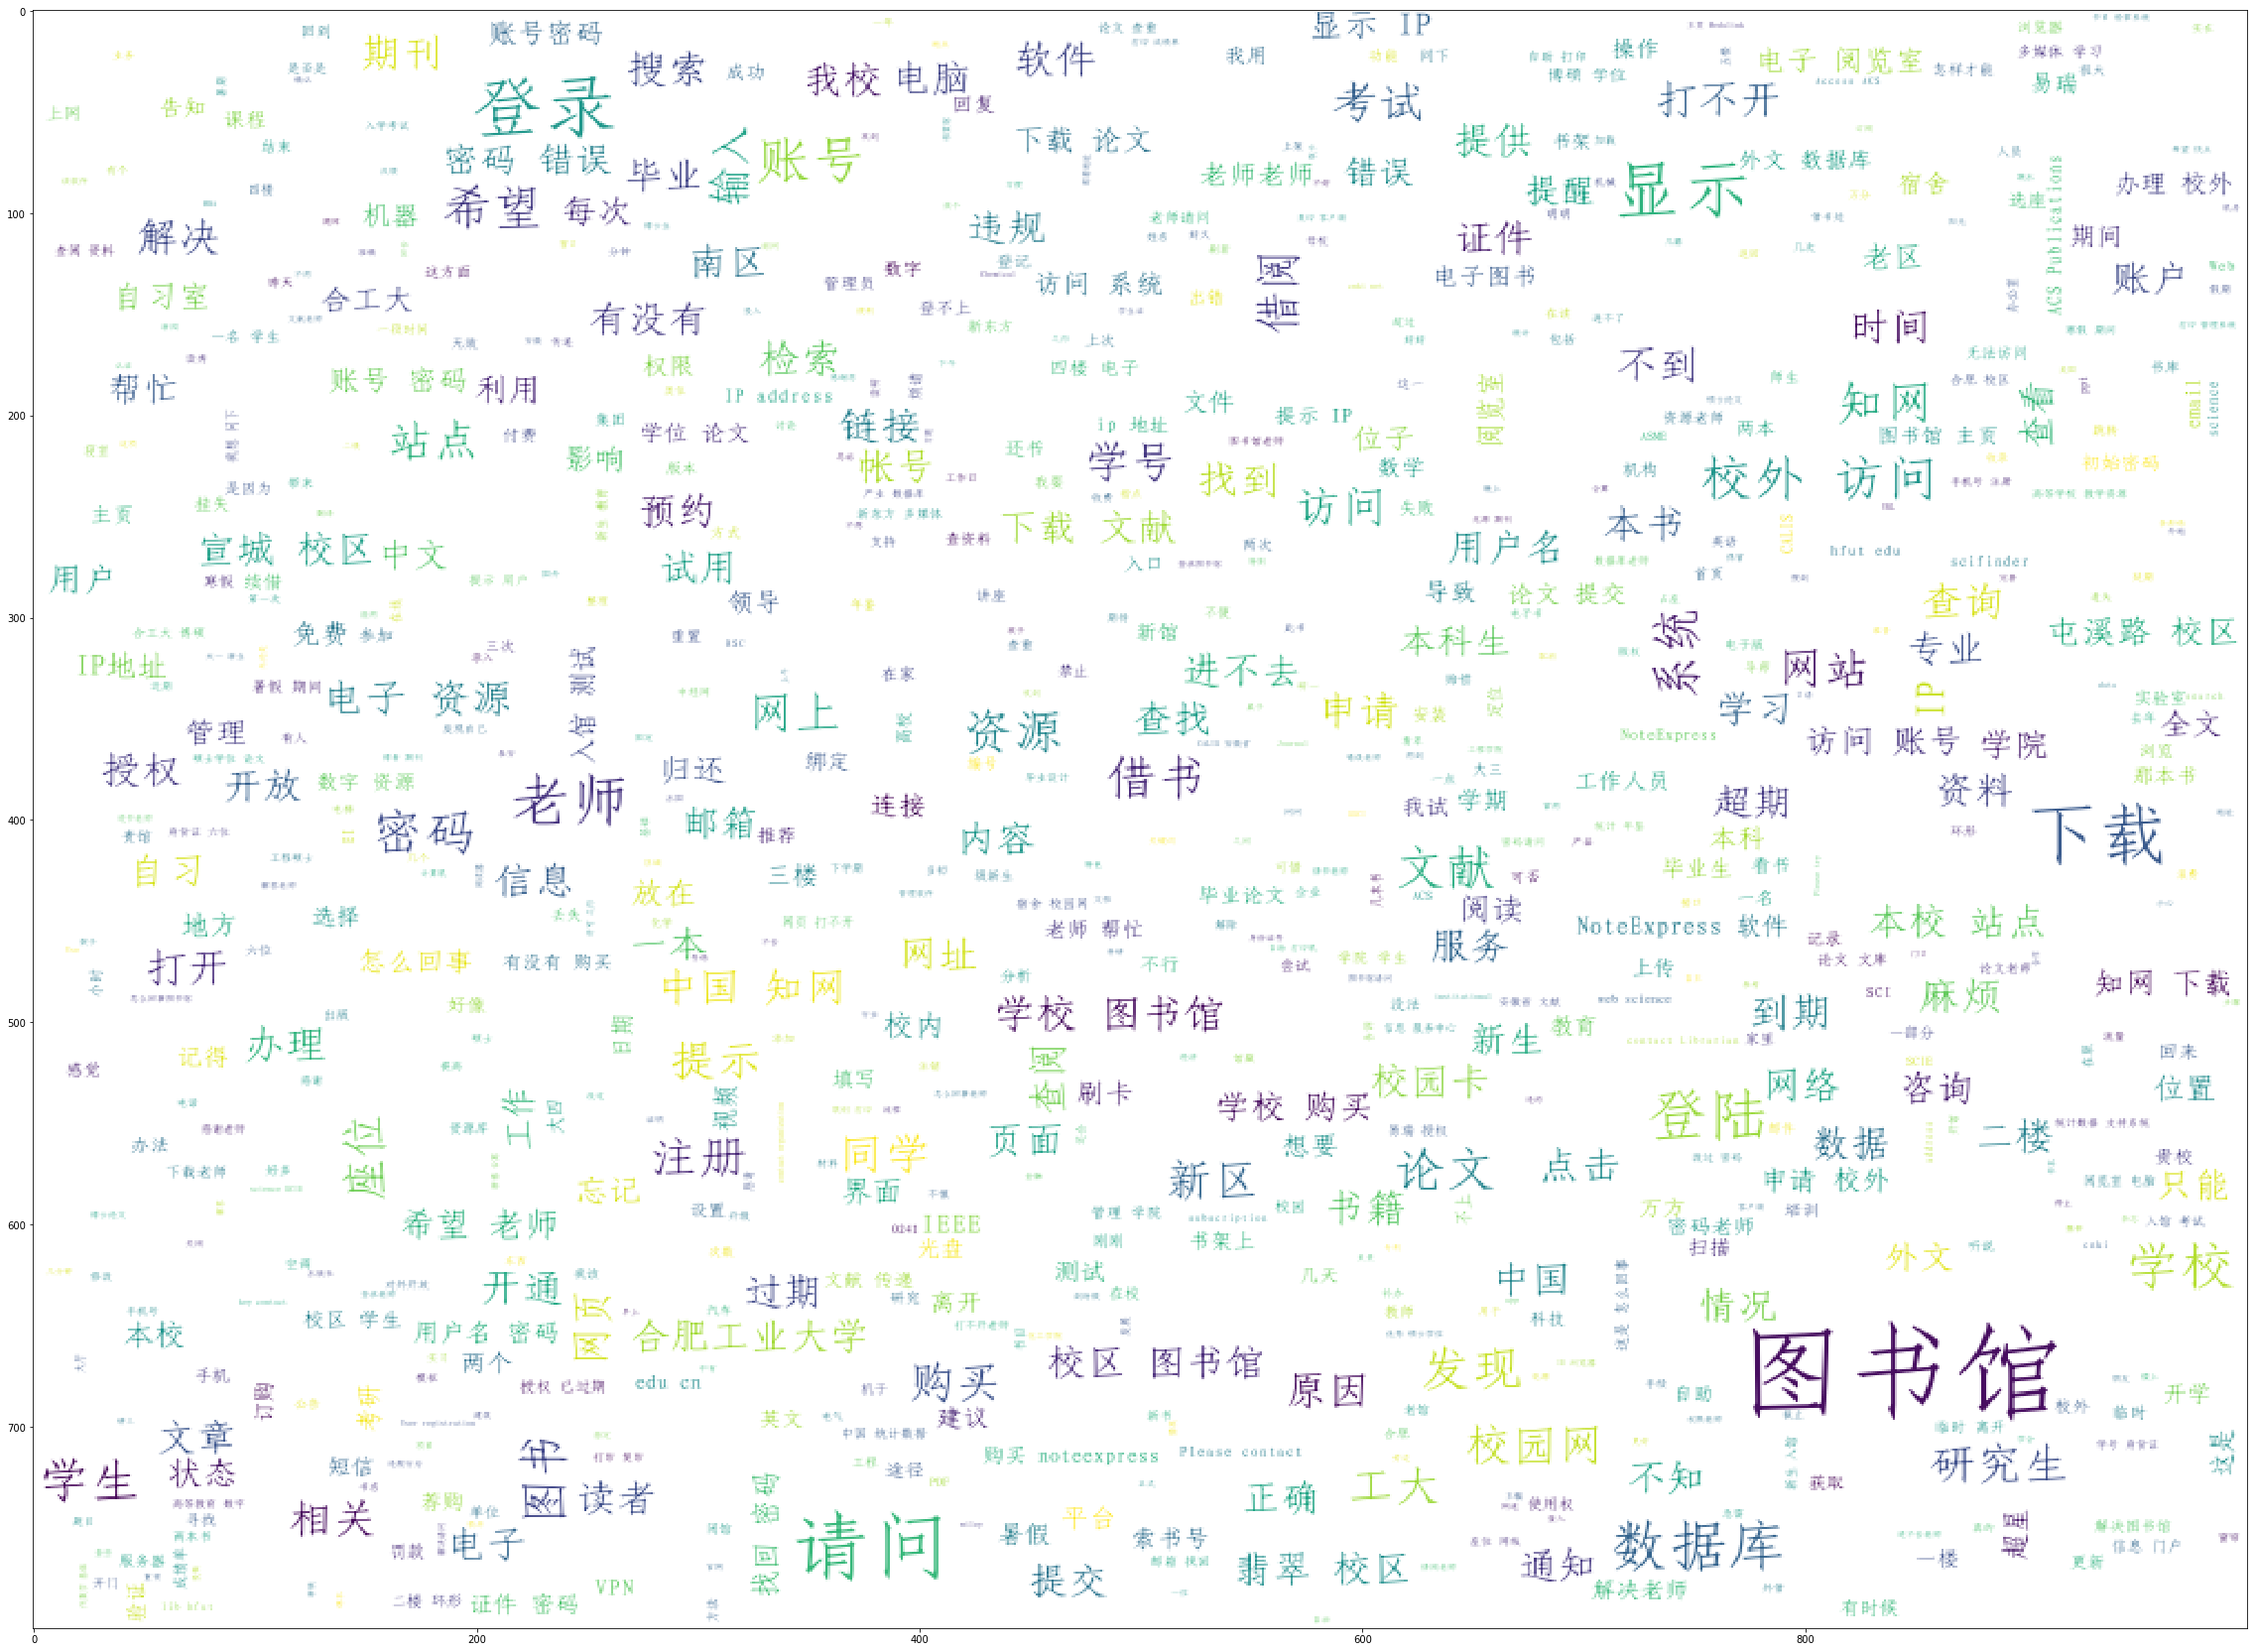

In [204]:
wc = WordCloud()
text = all_word_list
#bimg = imread('color.jpg')

wc = WordCloud(background_color = "white", #设置背景颜色
               #mask = "bimg",  #设置背景图片
               height=800,
               width=1000,
               max_words = 2000, #设置最大显示的字数
               font_path = "fangsong_GB2312.ttf",
               #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
               max_font_size = 50,  #设置字体最大值
               random_state = 40) #设置有多少种随机生成状态，即有多少种配色方案

wc.generate(text)
plt.figure(figsize = (40,30))
plt.imshow(wc,interpolation='nearest', aspect='auto')

In [206]:
#对文本进行特征抽取
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [207]:
#特征个数
n_features = 1000

In [208]:
#tf-idf抽取
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                #stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)

In [209]:
#查看特征名称
feature_name = tf_vectorizer.get_feature_names()

In [210]:
feature_name

['12',
 '2014',
 '2015',
 '2017',
 'http',
 'ieee',
 'ip',
 'ip地址',
 'is',
 'noteexpress',
 'of',
 'scie',
 'science',
 'the',
 'vpn',
 'web',
 'your',
 '一名',
 '一本',
 '万方',
 '三楼',
 '下载',
 '不到',
 '不知',
 '不行',
 '专业',
 '中国',
 '中文',
 '临时',
 '主页',
 '书籍',
 '二楼',
 '位置',
 '信息',
 '借书',
 '借阅',
 '免费',
 '入馆',
 '全文',
 '内容',
 '几天',
 '利用',
 '到期',
 '办理',
 '南区',
 '原因',
 '发现',
 '只能',
 '合工大',
 '合肥',
 '合肥工业大学',
 '同学',
 '告知',
 '咨询',
 '四楼',
 '回复',
 '图书',
 '图书馆',
 '地址',
 '地方',
 '外文',
 '失败',
 '学习',
 '学位',
 '学号',
 '学期',
 '学校',
 '学生',
 '学院',
 '宣城',
 '宿舍',
 '密码',
 '寒假',
 '寝室',
 '导致',
 '尊敬',
 '屯溪路',
 '工作',
 '工作人员',
 '工大',
 '已过期',
 '希望',
 '帐号',
 '帮忙',
 '平台',
 '座位',
 '建议',
 '开学',
 '开放',
 '开通',
 '归还',
 '影响',
 '忘记',
 '怎么回事',
 '情况',
 '想要',
 '感谢',
 '成功',
 '我校',
 '我用',
 '我试',
 '手机',
 '手续',
 '打不开',
 '打开',
 '找到',
 '找回',
 '授权',
 '提交',
 '提供',
 '提示',
 '提醒',
 '搜索',
 '操作',
 '放在',
 '教育',
 '数字',
 '数据',
 '数据库',
 '文献',
 '文章',
 '新东方',
 '新区',
 '新生',
 '时间',
 '易瑞',
 '显示',
 '暑假',
 '有没有',
 '服务',
 '期刊',
 '期间',
 '本书',
 '本校',
 '本科',
 '本科生'

In [211]:
print(tf.toarray())
tf.toarray().shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1161, 227)

In [212]:
tf.shape

(1161, 227)

In [22]:
type(tf)

scipy.sparse.csr.csr_matrix

In [85]:
tf

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [213]:
#转换为一个数据框
df_tf=pd.DataFrame(tf.toarray(),columns=feature_name)

In [214]:
df_tf.head()

,12,2014,2015,2017,http,ieee,ip,ip地址,is,noteexpress,...,通知,邮箱,链接,错误,问下,阅览室,阅读,页面,预约,麻烦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#进行LDA主题建模
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
n_topics = 5
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [15]:
lda.fit(tf)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [16]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [17]:
n_top_words = 20

In [18]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
下载 知网 站点 论文 ip 无法 为什么 文献 登录 数据库 校园网 不了 打不开 不能 资源 显示 中国 本校 请问 使用
Topic #1:
图书馆 老师 访问 校外 您好 请问 登陆 需要 账号 资源 什么 登录 谢谢 使用 怎么 注册 论文 显示 如何 可以
Topic #2:
密码 图书馆 老师 学号 输入 找回 邮箱 信息 显示 没有 登陆 才能 系统 您好 怎么 登录 错误 谢谢 请问 时候
Topic #3:
图书馆 学校 购买 数据库 下载 没有 我们 文献 请问 软件 校区 noteexpress 谢谢 您好 宣城 这个 希望 电子 使用 学习
Topic #4:
图书馆 老师 可以 您好 请问 谢谢 现在 图书 不到 时候 什么 不能 新区 借书 借阅 没有 一下 校区 学生 怎么



In [19]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.118717 -0.089424       1        1  29.027962
1     -0.013287  0.073513       2        1  23.437550
0      0.255088  0.114758       3        1  19.244493
2     -0.187498  0.129194       4        1  14.752052
3      0.064414 -0.228041       5        1  13.537943, topic_info=     Category        Freq  Term       Total  loglift  logprob
term                                                         
108   Default  236.000000    密码  236.000000  30.0000  30.0000
24    Default  245.000000    下载  245.000000  29.0000  29.0000
276   Default  135.000000    访问  135.000000  28.0000  28.0000
103   Default  150.000000    学校  150.000000  27.0000  27.0000
287   Default   86.000000    购买   86.000000  26.0000  26.0000
240   Default  107.000000    知网  107.000000  25.0000  25.0000
208   Default  110.000000    校外  110.000000  24.0000  24.0000
172   Default  165.000000   数据库  165.000000  23.0000  23.0000
101   Default   72.000000    学号   72.000000  22.0000  22.0000
244   Default   84.000000    站点   84.000000  21.0000  21.0000
259   Default  420.000000    老师  420.000000  20.0000  20.0000
173   Default  107.000000    文献  107.000000  19.0000  19.0000
274   Default  128.000000    论文  128.000000  18.0000  18.0000
6     Default   68.000000    ip   68.000000  17.0000  17.0000
218   Default  152.000000    没有  152.000000  16.0000  16.0000
235   Default  142.000000    登陆  142.000000  15.0000  15.0000
88    Default  605.000000   图书馆  605.000000  14.0000  14.0000
148   Default   86.000000    我们   86.000000  13.0000  13.0000
284   Default   97.000000    账号   97.000000  12.0000  12.0000
293   Default   49.000000    输入   49.000000  11.0000  11.0000
160   Default   48.000000    找回   48.000000  10.0000  10.0000
312   Default   48.000000    邮箱   48.000000   9.0000   9.0000
205   Default   86.000000    校区   86.000000   8.0000   8.0000
234   Default  160.000000    登录  160.000000   7.0000   7.0000
157   Default   60.000000   打不开   60.000000   6.0000   6.0000
292   Default   44.000000    软件   44.000000   5.0000   5.0000
50    Default   46.000000    信息   46.000000   4.0000   4.0000
207   Default   78.000000   校园网   78.000000   3.0000   3.0000
289   Default  152.000000    资源  152.000000   2.0000   2.0000
219   Default   59.000000    注册   59.000000   1.0000   1.0000
...       ...         ...   ...         ...      ...      ...
15     Topic5   18.573223    一些   26.783166   1.6336  -4.6383
238    Topic5   26.496689    相关   38.968928   1.6139  -4.2830
163    Topic5   16.927052    提供   25.400320   1.5938  -4.7311
319    Topic5   20.029391   阅览室   30.833345   1.5683  -4.5629
161    Topic5   18.649427    授权   30.067787   1.5220  -4.6342
53     Topic5    7.752879    免费   12.622453   1.5123  -5.5120
125    Topic5    8.846282    平台   14.450770   1.5089  -5.3801
249    Topic5    7.707350    经常   12.634087   1.5054  -5.5179
189    Topic5   21.956940   有没有   36.178506   1.5003  -4.4710
178    Topic5   12.985679    方便   22.178078   1.4644  -4.9962
148    Topic5   50.207030    我们   86.152285   1.4597  -3.6439
262    Topic5   11.594282    能否   20.284247   1.4403  -5.1095
217    Topic5    7.120732  毕业论文   12.497337   1.4372  -5.5970
288    Topic5   17.639043    资料   31.310374   1.4258  -4.6899
172    Topic5   74.573904   数据库  165.156994   1.2046  -3.2483
205    Topic5   38.127961    校区   86.285465   1.1830  -3.9191
173    Topic5   44.966598    文献  107.677115   1.1265  -3.7541
218    Topic5   53.093560    没有  152.048777   0.9475  -3.5880
298    Topic5   31.438328    这个   81.760800   1.0439  -4.1120
88     Topic5  114.850786   图书馆  605.661251   0.3370  -2.8164
24     Topic5   54.386521    下载  245.019893   0.4945  -3.5639
121    Topic5   30.274802    希望   85.047679   0.9668  -4.1497
230    Topic5   29.007151    电子   86.472450   0.9074  -4.1925
279    Topic5   43.461078    请问  317.242634   0.0119  -3.7882
49     Topic5   28.564346    使用  148.477246  

In [20]:
n_topics = 10
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)
print_top_words(lda, tf_feature_names, n_top_words)
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic #0:
需要 学校 相关 资料 数据 谢谢 请问 能否 一些 哪些 工作 专业 可以 由于 试用 课程 毕业生 毕业 同学 一名
Topic #1:
访问 校外 论文 如何 请问 老师 注册 您好 申请 怎么 办理 一下 账号 提交 谢谢 工大 合工大 一直 查阅 不到
Topic #2:
希望 学习 尽快 非常 新东方 影响 还有 视频 最近 平台 自习室 使用 时候 根本 vpn 设置 网址 用户 2014 操作
Topic #3:
电子 阅览室 电脑 方便 能够 利用 地方 四楼 没有 平台 自己 建议 希望 同学 可以 网络 校区 软件 屯溪路 处理
Topic #4:
资源 数据库 站点 打不开 图书馆 使用 电子 本校 请问 为什么 网页 网站 知网 查询 连接 可以 打开 万方 怎么 但是
Topic #5:
密码 图书馆 老师 您好 登陆 请问 谢谢 登录 显示 什么 学号 购买 使用 数据库 需要 账号 学校 输入 找回 邮箱
Topic #6:
座位 图书馆 情况 违规 因为 一次 离开 自习 同学 临时 这种 问题 已经 自习室 而且 预约 这样 一个 查看 系统
Topic #7:
图书馆 老师 现在 可以 您好 谢谢 没有 什么 请问 借书 新区 考试 怎么 时候 但是 知道 不能 是否 不到 一下
Topic #8:
校区 图书馆 图书 学生 请问 借阅 可以 宣城 您好 翡翠 到期 暑假 校园卡 老师 期间 屯溪路 超期 归还 提醒 时候
Topic #9:
下载 知网 无法 文献 登录 ip 校园网 不能 显示 中国 不了 论文 进入 为什么 登陆 解决 图书馆 点击 范围 搜索



D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.139162  0.091066       1        1  27.034140
7     -0.114349  0.037105       2        1  23.030794
9      0.079773  0.238614       3        1  14.510602
1     -0.257916 -0.079947       4        1   9.253070
8     -0.101823 -0.032293       5        1   7.599263
4      0.039380  0.043723       6        1   5.852599
6      0.053137  0.145116       7        1   4.298167
0     -0.033985 -0.259029       8        1   4.025276
3      0.242426 -0.140916       9        1   2.532435
2      0.232520 -0.043441      10        1   1.863654, topic_info=     Category        Freq  Term       Total  loglift  logprob
term                                                         
24    Default  247.000000    下载  247.000000  30.0000  30.0000
289   Default  143.000000    资源  143.000000  29.0000  29.0000
88    Default  581.000000   图书馆  581.000000  28.0000  28.0000
172   Default  137.000000   数据库  137.000000  27.0000  27.0000
121   Default   96.000000    希望   96.000000  26.0000  26.0000
276   Default  146.000000    访问  146.000000  25.0000  25.0000
108   Default  230.000000    密码  230.000000  24.0000  24.0000
321   Default  130.000000    需要  130.000000  23.0000  23.0000
230   Default   91.000000    电子   91.000000  22.0000  22.0000
103   Default  136.000000    学校  136.000000  21.0000  21.0000
208   Default  121.000000    校外  121.000000  20.0000  20.0000
274   Default  138.000000    论文  138.000000  19.0000  19.0000
279   Default  312.000000    请问  312.000000  18.0000  18.0000
244   Default   75.000000    站点   75.000000  17.0000  17.0000
49    Default  130.000000    使用  130.000000  16.0000  16.0000
205   Default   90.000000    校区   90.000000  15.0000  15.0000
283   Default  224.000000    谢谢  224.000000  14.0000  14.0000
259   Default  411.000000    老师  411.000000  13.0000  13.0000
128   Default   57.000000    座位   57.000000  12.0000  12.0000
96    Default   93.000000    如何   93.000000  11.0000  11.0000
114   Default   45.000000    尽快   45.000000  10.0000  10.0000
87    Default   73.000000    图书   73.000000   9.0000   9.0000
218   Default  152.000000    没有  152.000000   8.0000   8.0000
240   Default  108.000000    知网  108.000000   7.0000   7.0000
99    Default   39.000000    学习   39.000000   6.0000   6.0000
157   Default   55.000000   打不开   55.000000   5.0000   5.0000
143   Default  287.000000    您好  287.000000   4.0000   4.0000
104   Default   81.000000    学生   81.000000   3.0000   3.0000
72    Default  232.000000    可以  232.000000   2.0000   2.0000
219   Default   66.000000    注册   66.000000   1.0000   1.0000
...       ...         ...   ...         ...      ...      ...
275   Topic10    1.413531    设置   19.079565   1.3801  -5.2310
253   Topic10    1.413530    网址   19.510939   1.3577  -5.2310
226   Topic10    0.703146    用户   16.996348   0.7974  -5.9293
49    Topic10    2.336199    使用  130.653140  -0.0414  -4.7286
180   Topic10    1.876351    时候  106.019781  -0.0517  -4.9478
151   Topic10    0.147524    我试    8.408370  -0.0604  -7.4909
120   Topic10    0.147524   已过期    8.989107  -0.1271  -7.4909
56    Topic10    0.147521    关于    9.273199  -0.1583  -7.4909
299   Topic10    0.147543    这些    9.339530  -0.1653  -7.4907
280   Topic10    0.147526    读秀    9.345765  -0.1660  -7.4908
3     Topic10    0.147525  2017    9.858218  -0.2194  -7.4909
117   Topic10    0.147537  工作人员    9.911739  -0.2248  -7.4908
317   Topic10    0.147524    问下   10.216200  -0.2551  -7.4909
60    Topic10    0.147524    几天   10.409794  -0.2739  -7.4909
95    Topic10    0.147555    失败   10.476412  -0.2801  -7.4907
23    Topic10    0.147541    上去   10.577340  -0.2897  -7.4907
217   Topic10    0.147524  毕业论文   10.581472  -0.2902  -7.4909
1     Topic10    0.166245  2014   13.737432  -0.4318  -7.3714
167   Topic10    0.153075    操作   13.113581  -0.4678  -7.4539
94    Topic10    0.147628    多次   10.651502  -0.2961  -7.4902
43    Topic10    0.1483

In [ ]:

from gensim.models.word2vec import Word2Vec
n_dim = 300         # 指定向量维度，大样本量是300至500较好
 
w2vmodel = Word2Vec(size = n_dim, min_count = 10)     # 至少在10个文档中出现过
w2vmodel.build_vocab(dpcq_df.words_list)             # 生成词表
w2vmodel
 


In [215]:
#文本聚类，k-means
from sklearn.cluster import KMeans
 
clf = KMeans(n_clusters = 5)
s = clf.fit(df_tf)
print(s)
clf.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


array([[ 5.12820513e-02,  1.28205128e-02,  1.28205128e-02, ...,
         2.42861287e-17,  1.02564103e-01,  3.84615385e-02],
       [ 1.16279070e-02,  3.48837209e-02,  3.48837209e-02, ...,
         3.48837209e-02, -6.93889390e-18,  4.65116279e-02],
       [-2.42861287e-17,  9.00900901e-03,  9.00900901e-03, ...,
         2.70270270e-02,  1.04083409e-17,  1.80180180e-02],
       [ 1.56250000e-02,  1.95312500e-02,  1.56250000e-02, ...,
         1.95312500e-02,  1.95312500e-02,  5.85937500e-02],
       [ 1.42857143e-02,  7.93650794e-03,  7.93650794e-03, ...,
         2.06349206e-02,  1.58730159e-02,  2.38095238e-02]])

In [216]:
df['label']=clf.labels_

In [217]:
df.to_excel('df22.xlsx')

In [259]:
df_content=df.content_cutted

In [262]:
type(df_content[1])

str

In [268]:
#将存放词的Series格式转换成list格式，一个样本存在一个list当中，完后在放到list当中，如下：
#[[paragraph1],[paragraph2],[paragraph3],...,[paragraphn]]
paragraph_list=[]
for sentence in df_content:
    sentence_list=[i for i in sentence.split()]
    paragraph_list.append(sentence_list)
    


In [269]:
type(paragraph_list)

list

In [270]:
paragraph_list[1]

['软件',
 '通是',
 '试用',
 '资源',
 '视屏',
 '是因为',
 '试用',
 '恳请',
 '学校',
 '一系列',
 '相关',
 '措施',
 '同学',
 '完整',
 '视频',
 '知识']

In [271]:
#训练词向量，或者句子向量
from gensim.models import Word2Vec


In [272]:
model = Word2Vec(paragraph_list, min_count=3,size=300)

In [273]:
print(model)

Word2Vec(vocab=794, size=300, alpha=0.025)


In [274]:
model.most_similar('图书')

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('显示', 0.9990267753601074),
 ('登录', 0.9989672899246216),
 ('下载', 0.9988952875137329),
 ('密码', 0.9988759160041809),
 ('学校', 0.9988512992858887),
 ('账号', 0.9988048076629639),
 ('提示', 0.9987965822219849),
 ('学生', 0.9987682700157166),
 ('登陆', 0.9987640380859375),
 ('座位', 0.9987584352493286)]

In [275]:
model.corpus_count

1161

In [278]:
type(model.wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [279]:
model.wv['密码']

array([-0.05265431,  0.01793374,  0.00305615, -0.08809195, -0.03726141,
        0.01025324,  0.0247492 , -0.00518295, -0.00849954, -0.03994922,
       -0.00923934, -0.02821784, -0.00890937, -0.00050072,  0.00623167,
       -0.04035906, -0.01247653,  0.0088379 ,  0.03769694, -0.03093268,
        0.00792136, -0.0206237 , -0.03383888, -0.01267752,  0.02676495,
       -0.01448311, -0.02922932,  0.07448848, -0.00057202,  0.05255125,
       -0.02147018, -0.02788756,  0.01453214, -0.04492518, -0.00123722,
       -0.02632025,  0.04221795, -0.01764108,  0.03098826,  0.01706408,
        0.01792792, -0.01897035,  0.00576723, -0.01353566, -0.01572048,
        0.03376101, -0.01886637, -0.02874681, -0.01290327, -0.0171091 ,
        0.02782969, -0.00937865, -0.08029886,  0.01055156,  0.03810432,
       -0.02519082,  0.04482801,  0.05004619, -0.05071836, -0.00675048,
       -0.02610409, -0.00051718, -0.03323954, -0.0123959 ,  0.00796317,
        0.02234507,  0.02247536,  0.04060484,  0.0202336 ,  0.02

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


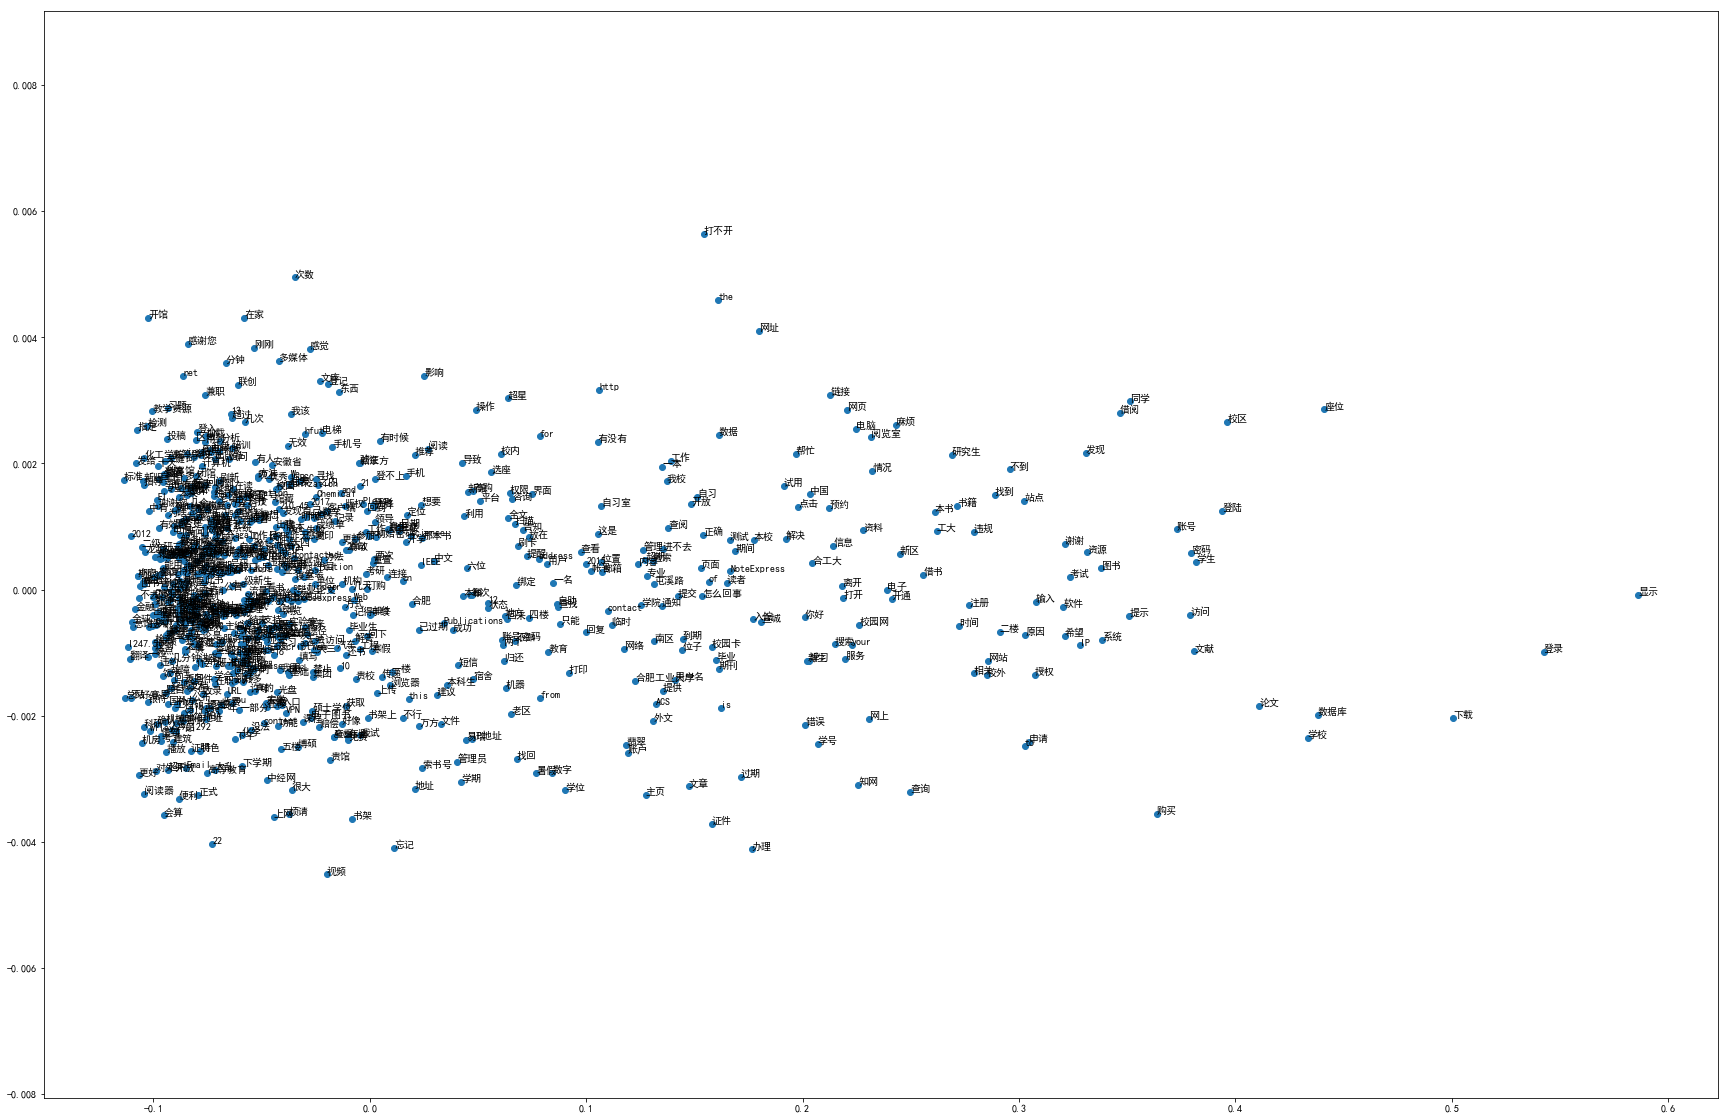

In [291]:
from matplotlib import pyplot
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
pyplot.rcParams['axes.unicode_minus']=False #用来正常显示负号
pyplot.figure(figsize=(30,20))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [285]:
type(X)

numpy.ndarray

In [287]:
X.shape

(794, 300)

In [ ]:
#段落向量


from gensim.models.doc2vec import DocVec,TaggedDocument
documents=[TaggedDocument(doc,[i]) for i,doc in enumerate(common_texts)]
model=Doc2Vec(documents,vector_size=5,window=2,min_count=1,workes=4)

In [292]:
from gensim.test.utils import common_texts

In [294]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

In [295]:
type(common_texts)

list

In [297]:
common_texts[2]

['eps', 'user', 'interface', 'system']

In [303]:
documents=[TaggedDocument(doc,[i]) for i,doc in enumerate(paragraph_list)]

In [299]:
type(documents)

list

In [304]:
documents[1]

TaggedDocument(words=['软件', '通是', '试用', '资源', '视屏', '是因为', '试用', '恳请', '学校', '一系列', '相关', '措施', '同学', '完整', '视频', '知识'], tags=[1])

In [305]:
documents[2]

TaggedDocument(words=['平时', '借书', '到期', '短信', '邮箱', '提醒', '还书', '图书', '到期', '收到', '到期', '提醒', '邮箱', '短信', '查询', '借阅', '状态', '发现', '超期', '到期', '日期', '14', '15', '超期', '13', '12', '10', '罚款', '其他人', '提醒', '告知'], tags=[2])

In [306]:
model=Doc2Vec(documents,vector_size=5,window=2,min_count=1,workes=4)

In [307]:
model.docvecs[1]

array([ 0.08586589, -0.01092878,  0.09122184,  0.06946183, -0.07182657],
      dtype=float32)